# 1.a Import Libraries/Dataset

In [73]:
# Changing the width of the Jupyter notebook
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:90% ! important; }<style>"))

# Importing the required libraries
import pandas as pd
from pandas.api.types import is_numeric_dtype
pd.options.mode.chained_assignment = None  # default='warn'
import numpy as np
from datetime import datetime, date
import matplotlib.pyplot as plt
import seaborn as sns


from sklearn.datasets import load_digits
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score


# Converting data in CSV into a dataframe
anomaly_df = pd.read_csv('Anamoly.csv')

C:\Users\amano\AppData\Local\Temp\ipykernel_9076\161546914.py:2: DeprecationWarning: Importing display from IPython.core.display is deprecated since IPython 7.14, please import from IPython display
  from IPython.core.display import display, HTML


# 1.b Data Visualization and Exploration 

1.	Print 2 rows for sanity check to identify all the features present in the dataset and if the target matches with them.

In [74]:
# Displaying the first and last few rows
pd.set_option('display.expand_frame_repr', False)
anomaly_df.head(10)
anomaly_df.tail(10)

,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate,class
22534,0,tcp,private,REJ,0,0,0,0,0,0,...,10.0,0.04,0.07,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
22535,0,tcp,http,SF,280,6087,0,0,0,0,...,255.0,1.00,0.00,0.20,0.04,0.00,0.0,0.00,0.00,normal
22536,0,tcp,iso_tsap,REJ,0,0,0,0,0,0,...,18.0,0.07,0.05,0.00,0.00,0.00,0.0,1.00,1.00,anomaly
22537,1,tcp,smtp,SF,2599,293,0,0,0,0,...,186.0,0.73,0.13,0.00,0.00,0.00,0.0,0.26,0.00,anomaly
22538,0,icmp,ecr_i,SF,1032,0,0,0,0,0,...,255.0,1.00,0.00,1.00,0.00,0.00,0.0,0.00,0.00,anomaly
22539,0,tcp,smtp,SF,794,333,0,0,0,0,...,141.0,0.72,0.06,0.01,0.01,0.01,0.0,0.00,0.00,normal
22540,0,tcp,http,SF,317,938,0,0,0,0,...,255.0,1.00,0.00,0.01,0.01,0.01,0.0,0.00,0.00,normal
22541,0,tcp,http,SF,54540,8314,0,0,2,0,...,255.0,1.00,0.00,0.00,0.00,0.00,0.0,0.07,0.07,anomaly
22542,0,udp,domain_u,SF,42,42,0,0,0,0,...,252.0,0.99,0.01,0.00,0.00,0.00,0.0,0.00,0.00,normal
22543,0,tcp,sunrpc,REJ,0,0,0,0,0,0,...,21.0,0.08,0.03,0.00,0.00,0.00,0.0,0.44,1.00,anomaly


2.	Comment on class imbalance with appropriate visualization method.

As seen from the vizualization below there is no class imbalance. The 

class
anomaly    12833
normal      9711
Name: count, dtype: int64


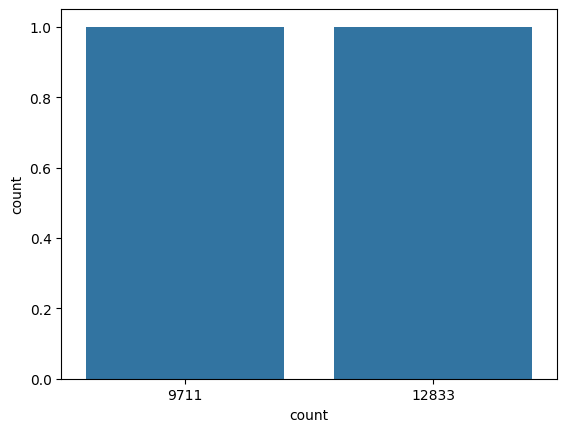

In [75]:
# Counting teh records under Class values
df=anomaly_df['class'].value_counts()
print(df)
plot1=sns.countplot(x=df)

3.	Provide appropriate visualizations to get an insight about the dataset.

In [76]:
# display column headings:
columns_list = list(anomaly_df.columns)
print("List of all columns in the dataset:\n\n"+str(columns_list))
print("===============================================================================\n")

print("List of all columns in the dataset with the Non Null counts & Datatype:\n")
anomaly_df.info()
print("===============================================================================\n")

# describe statistical information:
print("Statitical details of all columns in the dataset:")
pd.set_option('display.expand_frame_repr', False)
anomaly_df.describe() 

List of all columns in the dataset:

['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class']

List of all columns in the dataset with the Non Null counts & Datatype:

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 22544 entries, 0 to 22543
Data columns (total 40 columns):
 #   Column                       Non-Null Count  Dtype  
---  ------

,duration,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,logged_in,num_compromised,root_shell,...,dst_host_count,dst_host_srv_count,dst_host_same_srv_rate,dst_host_diff_srv_rate,dst_host_same_src_port_rate,dst_host_srv_diff_host_rate,dst_host_serror_rate,dst_host_srv_serror_rate,dst_host_rerror_rate,dst_host_srv_rerror_rate
count,22544.000000,2.254400e+04,2.254400e+04,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,...,22531.000000,22532.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000,22544.000000
mean,218.859076,1.039545e+04,2.056019e+03,0.000311,0.008428,0.105394,0.021647,0.442202,0.119899,0.002440,...,193.863965,140.752663,0.608722,0.090540,0.132261,0.019638,0.097814,0.099426,0.233385,0.226683
std,1407.176612,4.727864e+05,2.121930e+04,0.017619,0.142599,0.928428,0.150328,0.496659,7.269597,0.049334,...,94.042593,111.786948,0.435688,0.220717,0.306268,0.085394,0.273139,0.281866,0.387229,0.400875
min,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000e+00,0.000000e+00,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,121.000000,15.000000,0.070000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,5.400000e+01,4.600000e+01,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,255.000000,168.000000,0.920000,0.010000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,0.000000,2.870000e+02,6.010000e+02,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,...,255.000000,255.000000,1.000000,0.060000,0.030000,0.010000,0.000000,0.000000,0.360000,0.170000
max,57715.000000,6.282565e+07,1.345927e+06,1.000000,3.000000,101.000000,4.000000,1.000000,796.000000,1.000000,...,255.000000,255.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [77]:
n = anomaly_df.nunique(axis=0)
print("No.of.unique values in each column :\n",n)


No.of.unique values in each column :
 duration                        624
protocol_type                     3
service                          64
flag                             11
src_bytes                      1149
dst_bytes                      3650
land                              2
wrong_fragment                    3
hot                              16
num_failed_logins                 5
logged_in                         2
num_compromised                  23
root_shell                        2
su_attempted                      3
num_root                         20
num_file_creations                9
num_shells                        4
num_access_files                  5
num_outbound_cmds                 1
is_guest_login                    2
count                           495
srv_count                       457
serror_rate                      88
srv_serror_rate                  82
rerror_rate                      90
srv_rerror_rate                  93
same_srv_rate             

In [78]:
#checking for NULL values in the columns
anomaly_df.isnull().sum()

duration                        0
protocol_type                   0
service                         0
flag                            0
src_bytes                       0
dst_bytes                       0
land                            0
wrong_fragment                  0
hot                             0
num_failed_logins               0
logged_in                       0
num_compromised                 0
root_shell                      0
su_attempted                    0
num_root                        0
num_file_creations              0
num_shells                      0
num_access_files                0
num_outbound_cmds               0
is_guest_login                  0
count                           0
srv_count                       0
serror_rate                     0
srv_serror_rate                 0
rerror_rate                     0
srv_rerror_rate                 0
same_srv_rate                   0
diff_srv_rate                   0
srv_diff_host_rate              0
dst_host_count

4.	Do the correlational analysis on the dataset. Provide a visualization for the same. Will this correlational analysis have an effect on feature selection that you will perform in the next step? Justify your answer. 

Yes, correlational analysis have an effect on feature selection.A 
Correlation Plot is very useful to highlight the most correlated variables in a data. In this plot, correlation coefficients is colored according to the value. If two variables are correlated, we can predict one from the other. Therefore, if two features are correlated, the model only needs one, as the second does not add additional information.

Few attributes are highly correlated, this might cause multi-colinearity while building the model. Hence only 1 among the 2 highly correlated variables should be chosen while runing the model. We can choose a correlation cutoff such as >0.7 to decide if that pair of attributes should be analyzed further to decide which one to keep and which one to discard.

<Axes: >

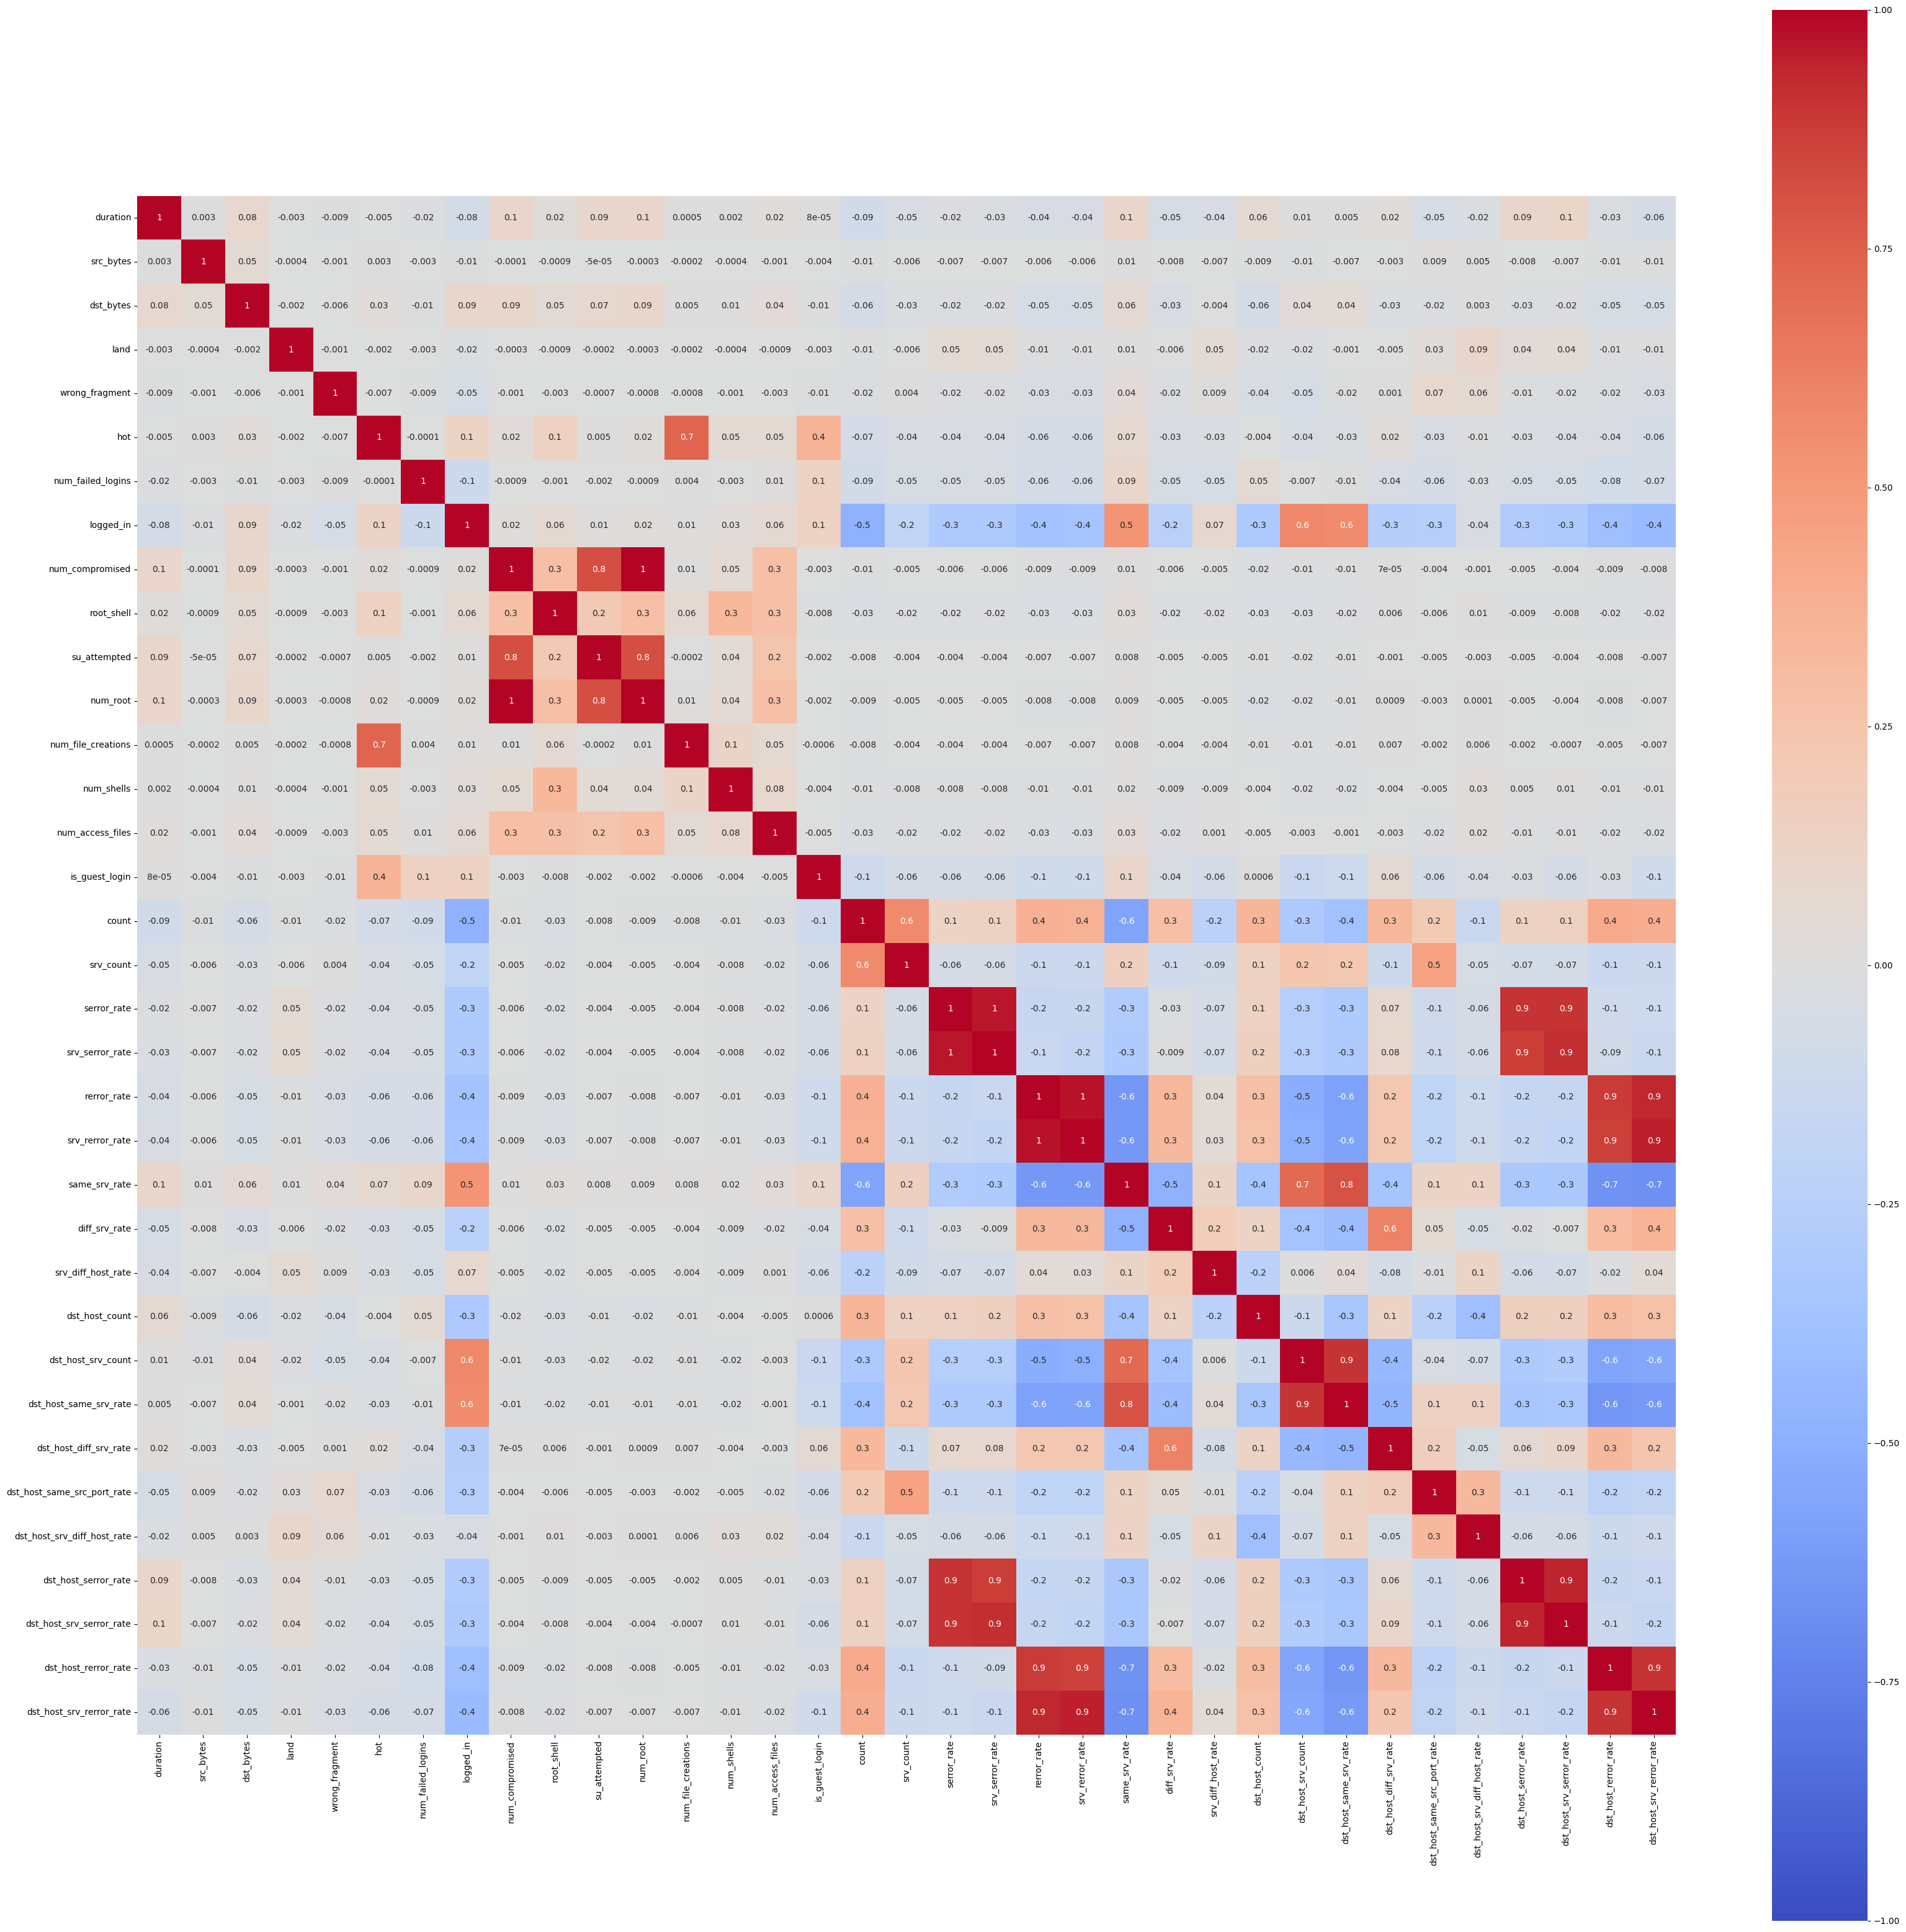

In [79]:
# Bivariate Analysis
# Dropping num_outbound_cmds as it has only one unique value
# For Continuous Variables
column_list = ['duration','src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 
               'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
               'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
               'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']
corr = anomaly_df[column_list].corr()
# Create larger heatmap
plt.figure(figsize=(40,40))
sns.heatmap(corr, cmap='coolwarm', annot=True,fmt='.1g', vmin=-1, vmax=1,square=True)

5.	Any other visualization specific to the problem statement.

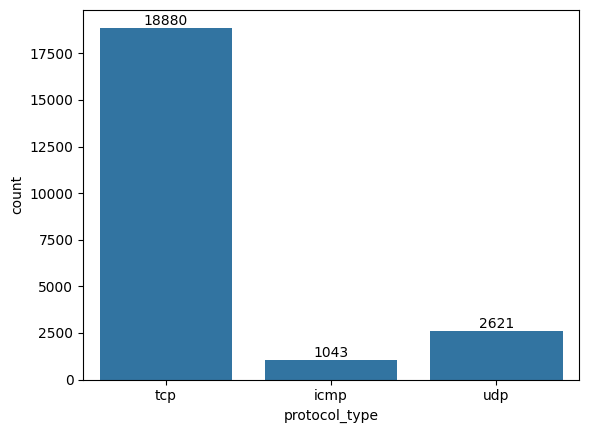

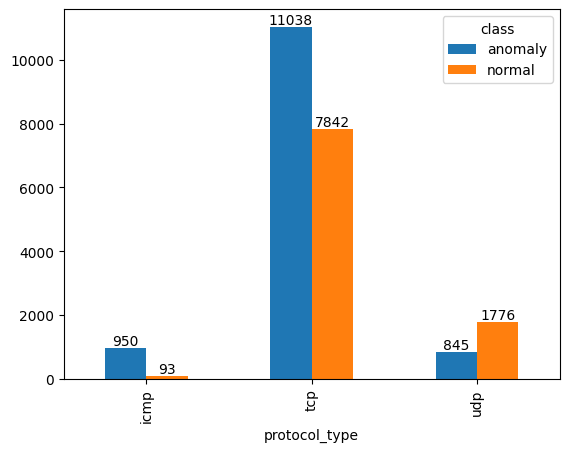

In [80]:
#Bivariate analysis for categorical variables
plot1=sns.countplot(x=anomaly_df['protocol_type'])
for container in plot1.containers:
    plot1.bar_label(container)
    
plot2=pd.crosstab(index=anomaly_df['protocol_type'],columns=anomaly_df['class']).plot.bar()
for container in plot2.containers:
    plot2.bar_label(container)

In [81]:
#Bivariate analysis for categorical variables
df=pd.crosstab(anomaly_df['service'], anomaly_df['class'], margins=True).sort_index(axis=0, ascending=False)
print(df.sort_values(by='All', ascending=False)[:11].to_string())


class     anomaly  normal    All
service                         
All         12833    9711  22544
http         1180    6673   7853
private      3922     852   4774
telnet       1582      44   1626
pop_3        1011       8   1019
smtp          316     618    934
domain_u        2     892    894
ftp_data      531     320    851
other         773      65    838
ecr_i         704      48    752
ftp           644      48    692


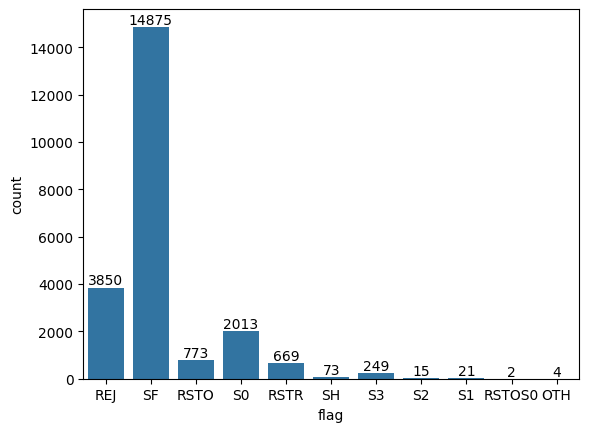

<Figure size 2000x800 with 0 Axes>

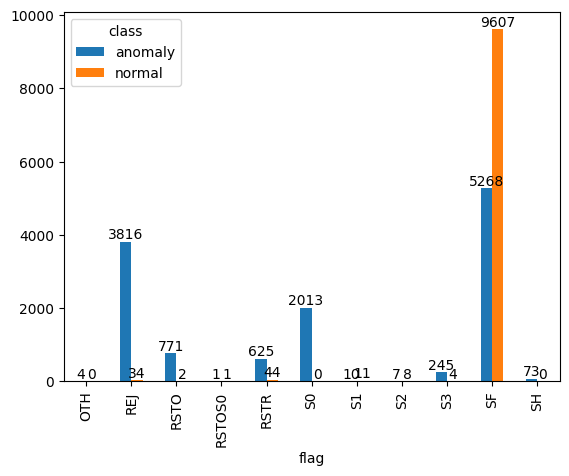

In [82]:
#Bivariate analysis for categorical variables
plot1=sns.countplot(x=anomaly_df['flag'])
for container in plot1.containers:
    plot1.bar_label(container) 

    plt.figure(figsize=(20, 8))
plot2=pd.crosstab(index=anomaly_df['flag'],columns=anomaly_df['class']).plot.bar()
for container in plot2.containers:
    plot2.bar_label(container)
    

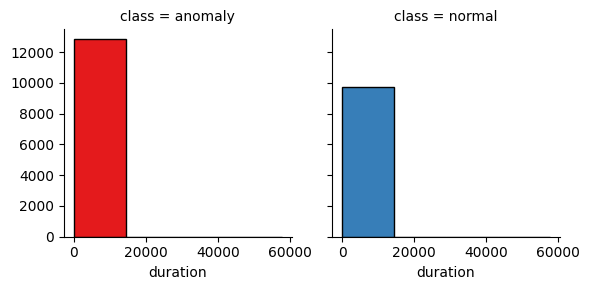

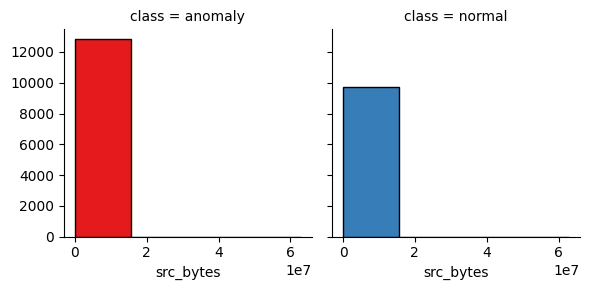

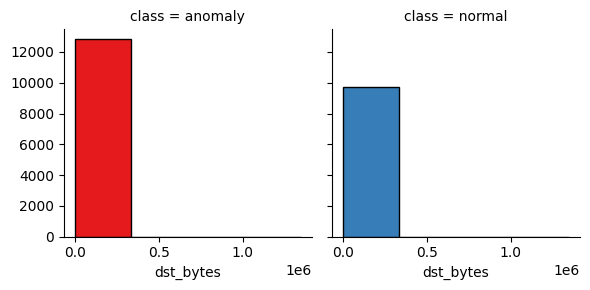

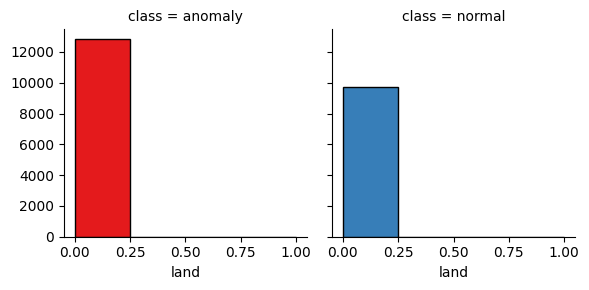

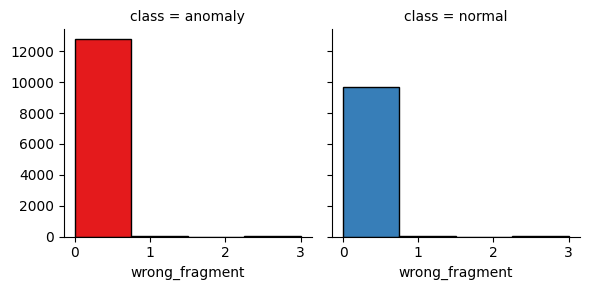

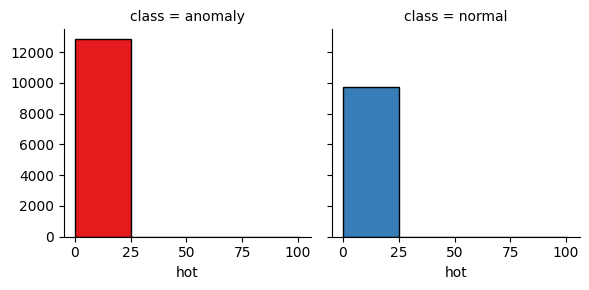

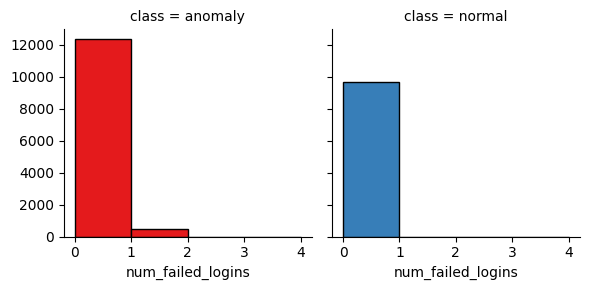

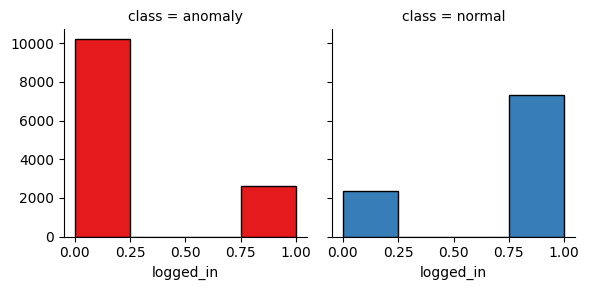

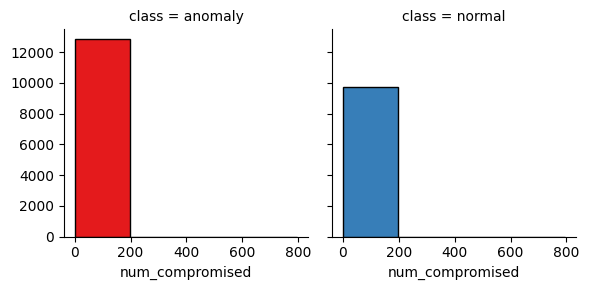

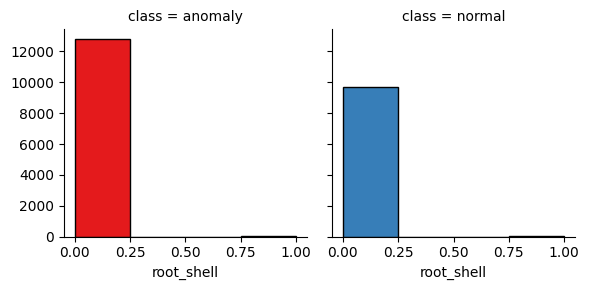

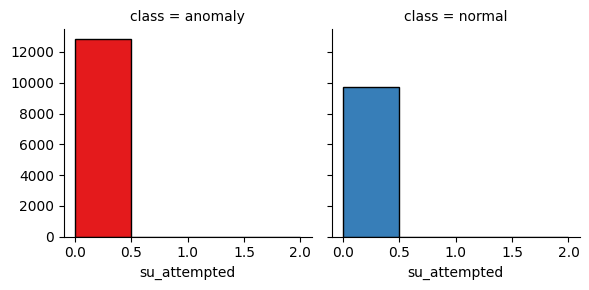

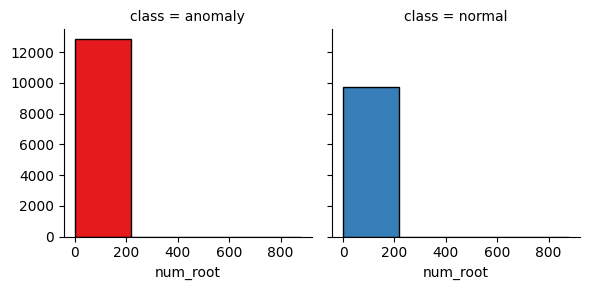

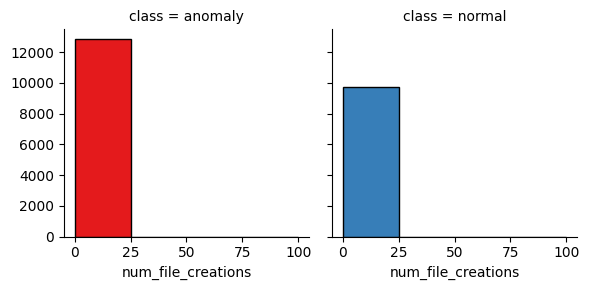

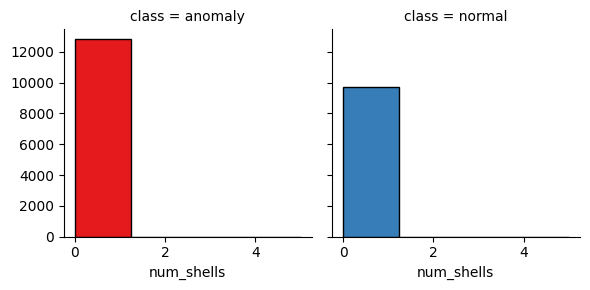

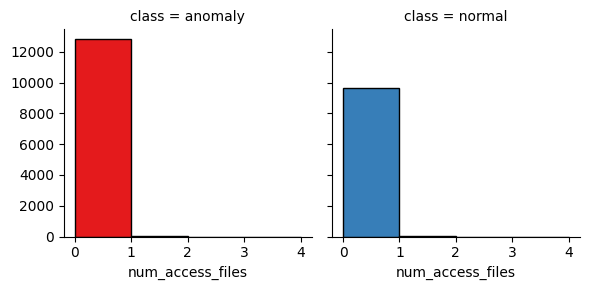

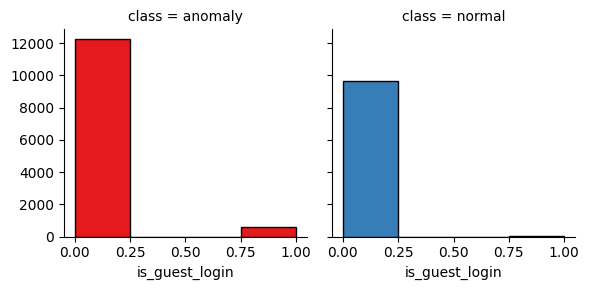

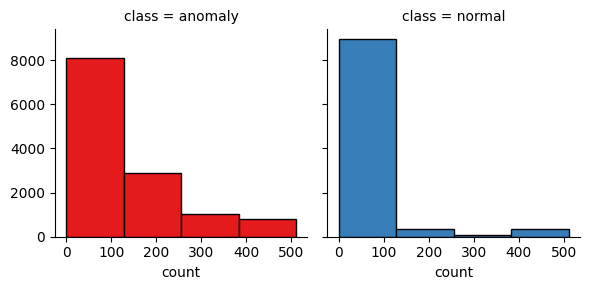

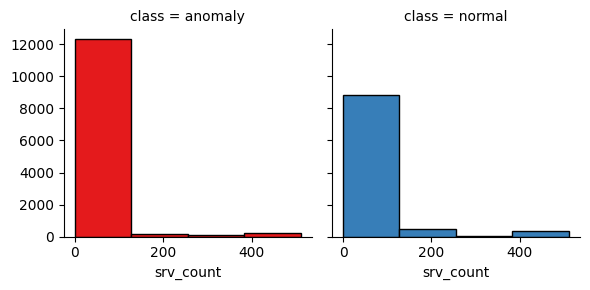

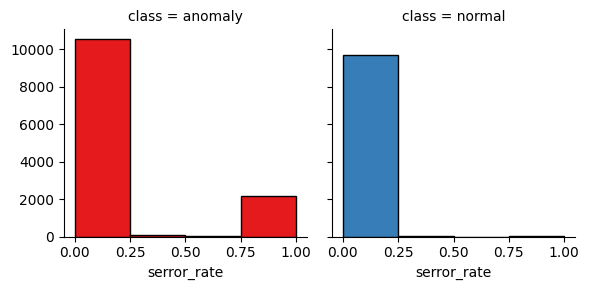

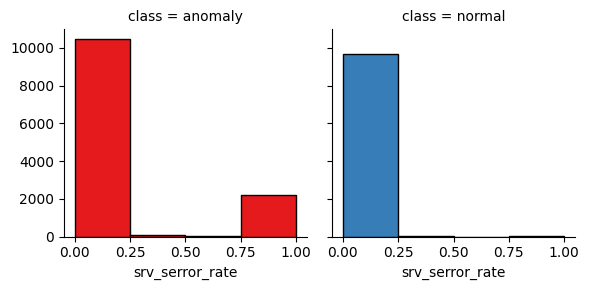

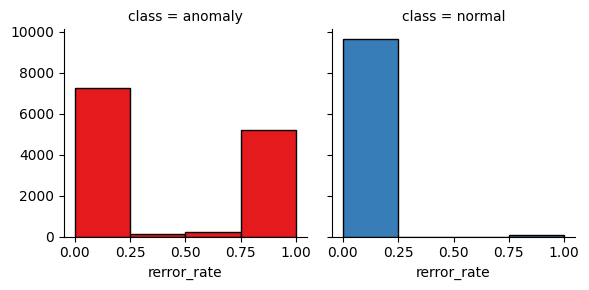

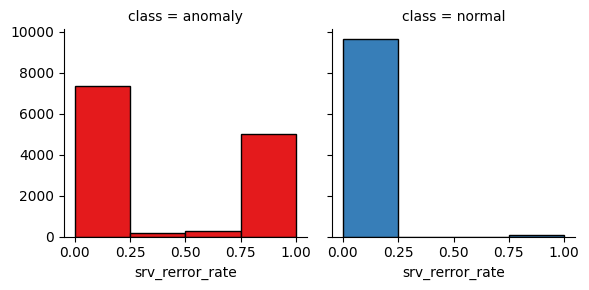

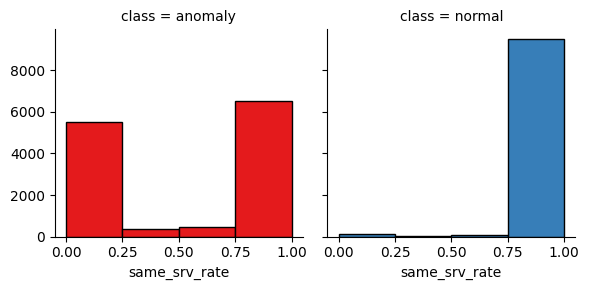

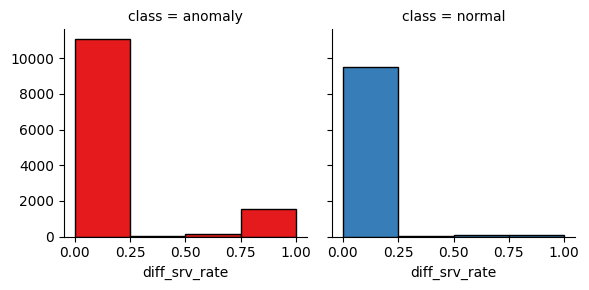

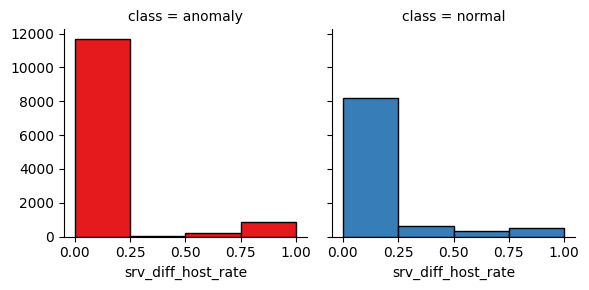

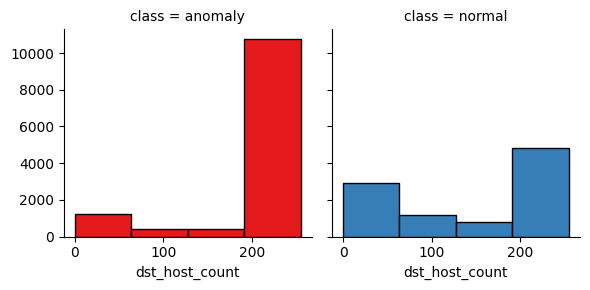

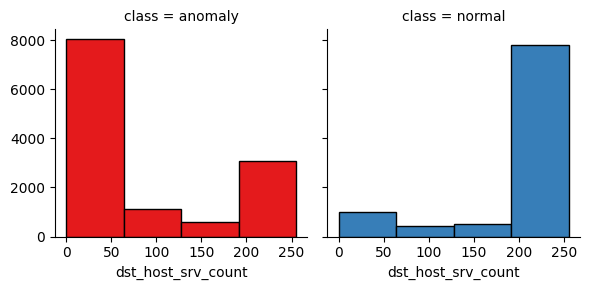

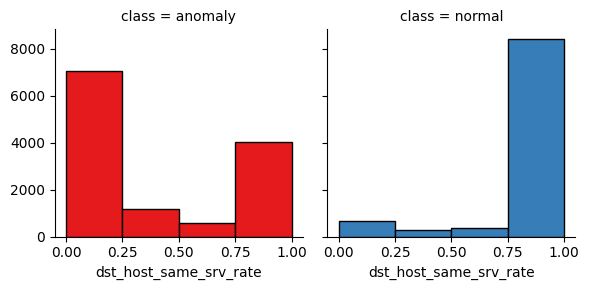

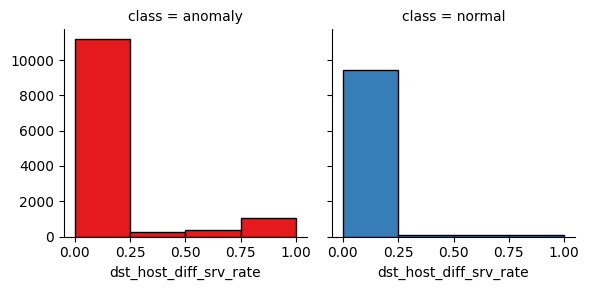

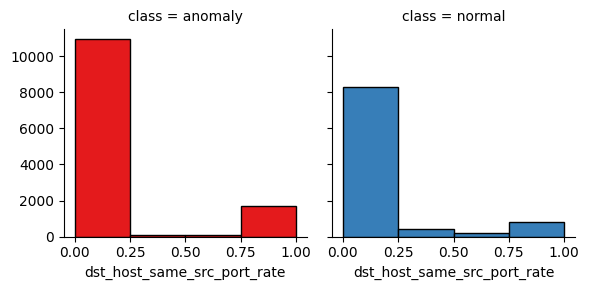

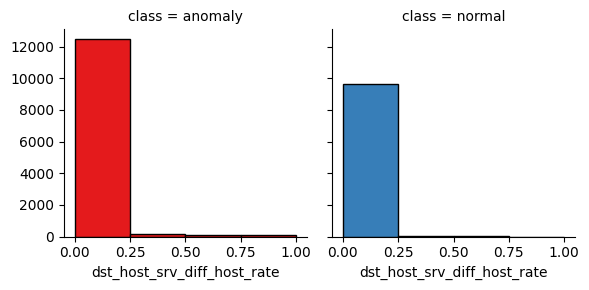

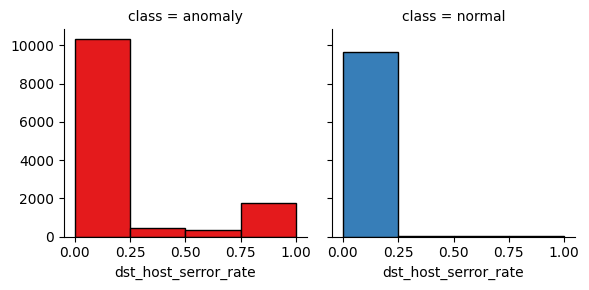

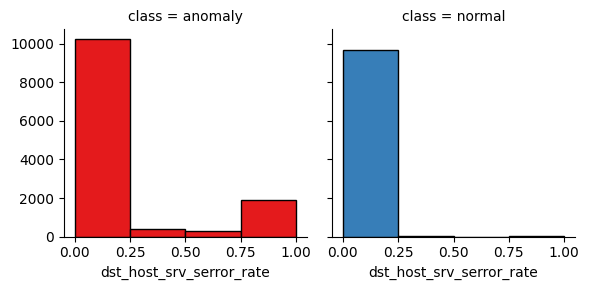

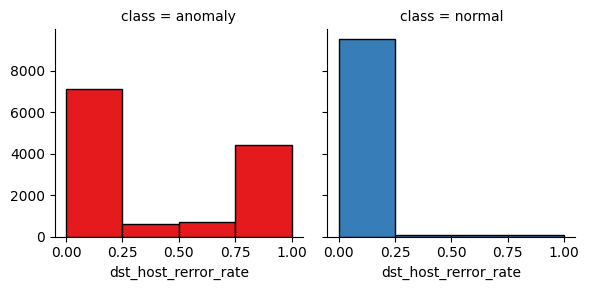

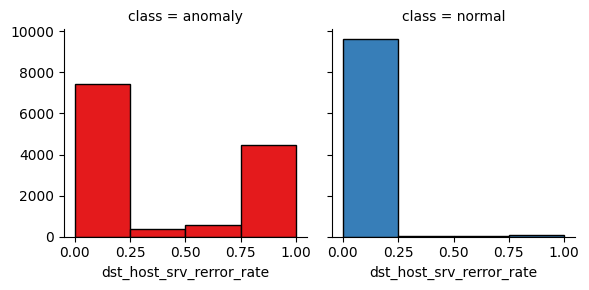

In [83]:
#Bivariate analysis of Continuous Variable with Target
column_list = ['duration','src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 
               'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 
               'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 
               'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate']

for column in column_list:
    bins = np.linspace(anomaly_df[column].min(), anomaly_df[column].max(),5)
    graph = sns.FacetGrid(anomaly_df, col="class", hue="class", palette="Set1", col_wrap=2)
    graph.map(plt.hist, column, bins=bins, ec="k")
    plt.show()

# 2. Data Pre-processing and cleaning

1.	Do the appropriate pre-processing of the data like identifying NULL or Missing Values if any, handling of outliers if present in the dataset, skewed data etc. Mention the pre-processing steps performed in the markdown cell. Explore a few latest data balancing tasks and its effect on model evaluation parameters. 

In [84]:
## Checking for Duplicates
print("Count before deduping: "+str(len(anomaly_df)))
anomaly_df_dedupe = anomaly_df.drop_duplicates()
print("Count after deduping: "+str(len(anomaly_df_dedupe)))

Count before deduping: 22544
Count after deduping: 22541


In [85]:
# Impute or remove missing data

# Check which value Mean, Median or Mode is suitable for missing inmutation
anomaly_df_subset=anomaly_df_dedupe[['dst_host_count','dst_host_srv_count']]
# print(loan_df_subset.head())
print("# Missing values:\n"+str(anomaly_df_subset.isnull().sum())+"\n")
print("Mean values:\n"+str(anomaly_df_subset.mean())+"\n")
print("Min values:\n"+str(anomaly_df_subset.min())+"\n")
print("Max values:\n"+str(anomaly_df_subset.max())+"\n")
print("Median values:\n"+str(anomaly_df_subset.median())+"\n")
print("Mode values:\n"+str(anomaly_df_subset.mode())+"\n")


# Counting the records under each variable values
print(anomaly_df_subset['dst_host_count'].value_counts())
print(anomaly_df_subset['dst_host_srv_count'].value_counts())

# We see that for both the variables the data is discrete values ranging from 0 to 255
# We will impute mode in the missing values for both attributes.


# Treating missing values in dst_host_count
anomaly_df_dedupe['dst_host_count'].fillna(255, inplace = True)
# Treating missing values in dst_host_srv_count       
anomaly_df_dedupe['dst_host_srv_count'].fillna(255, inplace = True)

print(anomaly_df_dedupe.isnull().sum())

# Missing values:
dst_host_count        13
dst_host_srv_count    12
dtype: int64

Mean values:
dst_host_count        193.855824
dst_host_srv_count    140.771273
dtype: float64

Min values:
dst_host_count        0.0
dst_host_srv_count    0.0
dtype: float64

Max values:
dst_host_count        255.0
dst_host_srv_count    255.0
dtype: float64

Median values:
dst_host_count        255.0
dst_host_srv_count    168.0
dtype: float64

Mode values:
   dst_host_count  dst_host_srv_count
0           255.0               255.0

dst_host_count
255.0    14626
1.0        365
2.0        236
3.0        200
4.0        182
         ...  
203.0       10
195.0        7
227.0        7
246.0        7
0.0          1
Name: count, Length: 256, dtype: int64
dst_host_srv_count
255.0    7525
1.0      1591
254.0     607
253.0     397
2.0       395
         ... 
202.0      10
112.0      10
207.0      10
205.0       7
0.0         1
Name: count, Length: 256, dtype: int64
duration                       0
protocol_type     

C:\Users\amano\AppData\Local\Temp\ipykernel_9076\903831884.py:23: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a copy.

For example, when doing 'df[col].method(value, inplace=True)', try using 'df.method({col: value}, inplace=True)' or df[col] = df[col].method(value) instead, to perform the operation inplace on the original object.


  anomaly_df_dedupe['dst_host_count'].fillna(255, inplace = True)
C:\Users\amano\AppData\Local\Temp\ipykernel_9076\903831884.py:25: FutureWarning: A value is trying to be set on a copy of a DataFrame or Series through chained assignment using an inplace method.
The behavior will change in pandas 3.0. This inplace method will never work because the intermediate object on which we are setting values always behaves as a c

In [86]:
# Outlier detection and handling
# Columns list to treat for outliers
column_list = ['src_bytes', 'dst_bytes', 'count', 'srv_count']

# Iterating through the columns list and capping & flooring values which are beyound the +-1.5 times the IQR
for column in column_list:
    print("Attribute Name: "+column)
        
    print("Min Value Before    : "+str(anomaly_df_dedupe[column].min()))
    print("Max Value Before    : "+str(anomaly_df_dedupe[column].max()))
    IQR = anomaly_df_dedupe[column].quantile(0.75)-anomaly_df_dedupe[column].quantile(0.25)
    print("Inter Quartile Range: "+str(IQR))
    Higher_outlier = anomaly_df_dedupe[column].quantile(0.75) + (IQR * 1.5)
    Lower_outlier = abs(anomaly_df_dedupe[column].quantile(0.25) - (IQR * 1.5))
    print("Higher_outlier      : "+str(Higher_outlier))
    print("Lower_outlier       : "+str(Lower_outlier))


    anomaly_df_dedupe.loc[anomaly_df_dedupe[column] >= Higher_outlier, column] = Higher_outlier
#     anomaly_df_dedupe.loc[anomaly_df_dedupe[column] <= Lower_outlier, column]  = Lower_outlier
    print("Min Value After     : "+str(anomaly_df_dedupe[column].min()))
    print("Max Value After     : "+str(anomaly_df_dedupe[column].max()))
    print("=======================================")
    

Attribute Name: src_bytes
Min Value Before    : 0
Max Value Before    : 62825648
Inter Quartile Range: 287.0
Higher_outlier      : 717.5
Lower_outlier       : 430.5
Min Value After     : 0.0
Max Value After     : 717.5
Attribute Name: dst_bytes
Min Value Before    : 0
Max Value Before    : 1345927
Inter Quartile Range: 601.0
Higher_outlier      : 1502.5
Lower_outlier       : 901.5
Min Value After     : 0.0
Max Value After     : 1502.5
Attribute Name: count
Min Value Before    : 0
Max Value Before    : 511
Inter Quartile Range: 122.0
Higher_outlier      : 306.0
Lower_outlier       : 182.0
Min Value After     : 0
Max Value After     : 306
Attribute Name: srv_count
Min Value Before    : 0
Max Value Before    : 511
Inter Quartile Range: 15.0
Higher_outlier      : 38.5
Lower_outlier       : 21.5
Min Value After     : 0.0
Max Value After     : 38.5


C:\Users\amano\AppData\Local\Temp\ipykernel_9076\3619075692.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '717.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  anomaly_df_dedupe.loc[anomaly_df_dedupe[column] >= Higher_outlier, column] = Higher_outlier
C:\Users\amano\AppData\Local\Temp\ipykernel_9076\3619075692.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '1502.5' has dtype incompatible with int64, please explicitly cast to a compatible dtype first.
  anomaly_df_dedupe.loc[anomaly_df_dedupe[column] >= Higher_outlier, column] = Higher_outlier
C:\Users\amano\AppData\Local\Temp\ipykernel_9076\3619075692.py:19: FutureWarning: Setting an item of incompatible dtype is deprecated and will raise an error in a future version of pandas. Value '38.5' has dtype incompatible with i

2.	Apply appropriate feature engineering techniques for them. Apply the feature transformation techniques like Standardization, Normalization, etc. You are free to apply the appropriate transformations depending upon the structure and the complexity of your dataset. Provide proper justification.

In [87]:
# Encode categorical data

# Distinct values in protocol_type
print(anomaly_df_dedupe.protocol_type.unique())

# protocol_type variable to Binary Values.
anomaly_df_onehoten = pd.get_dummies(anomaly_df_dedupe.protocol_type, prefix='PROTO')
print(anomaly_df_onehoten.head())

# Distinct values in service
print(anomaly_df_dedupe.service.unique())

# Service variable to Binary Values.
anomaly_df_onehoten1 = pd.get_dummies(anomaly_df_dedupe.service, prefix='SER')
anomaly_df_onehoten2=anomaly_df_onehoten1[['SER_http','SER_private','SER_telnet','SER_pop_3','SER_smtp']]
print(anomaly_df_onehoten2.head())


# Distinct values in flag
print(anomaly_df_dedupe.flag.unique())

# flag variable to Binary Values.
anomaly_df_onehoten3 = pd.get_dummies(anomaly_df_dedupe.flag, prefix='FLAG')
anomaly_df_onehoten4=anomaly_df_onehoten3[['FLAG_REJ','FLAG_SF','FLAG_S0']]
print(anomaly_df_onehoten4.head())

#Concatenate the three dataframes : 
anomaly_df_enc = pd.concat([anomaly_df_dedupe,anomaly_df_onehoten,anomaly_df_onehoten2,anomaly_df_onehoten4], axis=1)
# print(loan_df_enc.head())
columns_list = list(anomaly_df_enc.columns)
print(columns_list)


# Encoding Duration variable to presence or absence (1: if duration>0, 0: otherwise)
# Check if x is 0, then set flag to 0; otherwise, set flag to 1
anomaly_df_enc['duration_flag'] = anomaly_df_enc['duration'].apply(lambda x: 0 if x == 0 else 1)
print(list(anomaly_df_enc.columns))
anomaly_df_enc.head(10)

#Encoding class as 1:Anomaly 0:Normal
anomaly_df_enc['target'] = anomaly_df_enc['class'].replace({"anomaly": 1, "normal": 0})
print(list(anomaly_df_enc.columns))
anomaly_df_enc.head(10)


['tcp' 'icmp' 'udp']
   PROTO_icmp  PROTO_tcp  PROTO_udp
0       False       True      False
1       False       True      False
2       False       True      False
3        True      False      False
4       False       True      False
['private' 'ftp_data' 'eco_i' 'telnet' 'http' 'smtp' 'ftp' 'ldap' 'pop_3'
 'courier' 'discard' 'ecr_i' 'imap4' 'domain_u' 'mtp' 'systat' 'iso_tsap'
 'other' 'csnet_ns' 'finger' 'uucp' 'whois' 'netbios_ns' 'link' 'Z39_50'
 'sunrpc' 'auth' 'netbios_dgm' 'uucp_path' 'vmnet' 'domain' 'name' 'pop_2'
 'http_443' 'urp_i' 'login' 'gopher' 'exec' 'time' 'remote_job' 'ssh'
 'kshell' 'sql_net' 'shell' 'hostnames' 'echo' 'daytime' 'pm_dump' 'IRC'
 'netstat' 'ctf' 'nntp' 'netbios_ssn' 'tim_i' 'supdup' 'bgp' 'nnsp' 'rje'
 'printer' 'efs' 'X11' 'ntp_u' 'klogin' 'tftp_u']
   SER_http  SER_private  SER_telnet  SER_pop_3  SER_smtp
0     False         True       False      False     False
1     False         True       False      False     False
2     False        False  

C:\Users\amano\AppData\Local\Temp\ipykernel_9076\2381148614.py:41: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  anomaly_df_enc['target'] = anomaly_df_enc['class'].replace({"anomaly": 1, "normal": 0})


['duration', 'protocol_type', 'service', 'flag', 'src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 'num_file_creations', 'num_shells', 'num_access_files', 'num_outbound_cmds', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 'dst_host_srv_rerror_rate', 'class', 'PROTO_icmp', 'PROTO_tcp', 'PROTO_udp', 'SER_http', 'SER_private', 'SER_telnet', 'SER_pop_3', 'SER_smtp', 'FLAG_REJ', 'FLAG_SF', 'FLAG_S0', 'duration_flag', 'target']


,duration,protocol_type,service,flag,src_bytes,dst_bytes,land,wrong_fragment,hot,num_failed_logins,...,SER_http,SER_private,SER_telnet,SER_pop_3,SER_smtp,FLAG_REJ,FLAG_SF,FLAG_S0,duration_flag,target
0,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,False,True,False,False,False,True,False,False,0,1
1,0,tcp,private,REJ,0.0,0.0,0,0,0,0,...,False,True,False,False,False,True,False,False,0,1
2,2,tcp,ftp_data,SF,717.5,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,1,0
3,0,icmp,eco_i,SF,20.0,0.0,0,0,0,0,...,False,False,False,False,False,False,True,False,0,1
4,1,tcp,telnet,RSTO,0.0,15.0,0,0,0,0,...,False,False,True,False,False,False,False,False,1,1
5,0,tcp,http,SF,267.0,1502.5,0,0,0,0,...,True,False,False,False,False,False,True,False,0,0
6,0,tcp,smtp,SF,717.5,387.0,0,0,0,0,...,False,False,False,False,True,False,True,False,0,0
7,0,tcp,telnet,SF,129.0,174.0,0,0,0,1,...,False,False,True,False,False,False,True,False,0,1
8,0,tcp,http,SF,327.0,467.0,0,0,0,0,...,True,False,False,False,False,False,True,False,0,0
9,0,tcp,ftp,SF,26.0,157.0,0,0,0,1,...,False,False,False,False,False,False,True,False,0,1


Feature Selection

<Axes: >

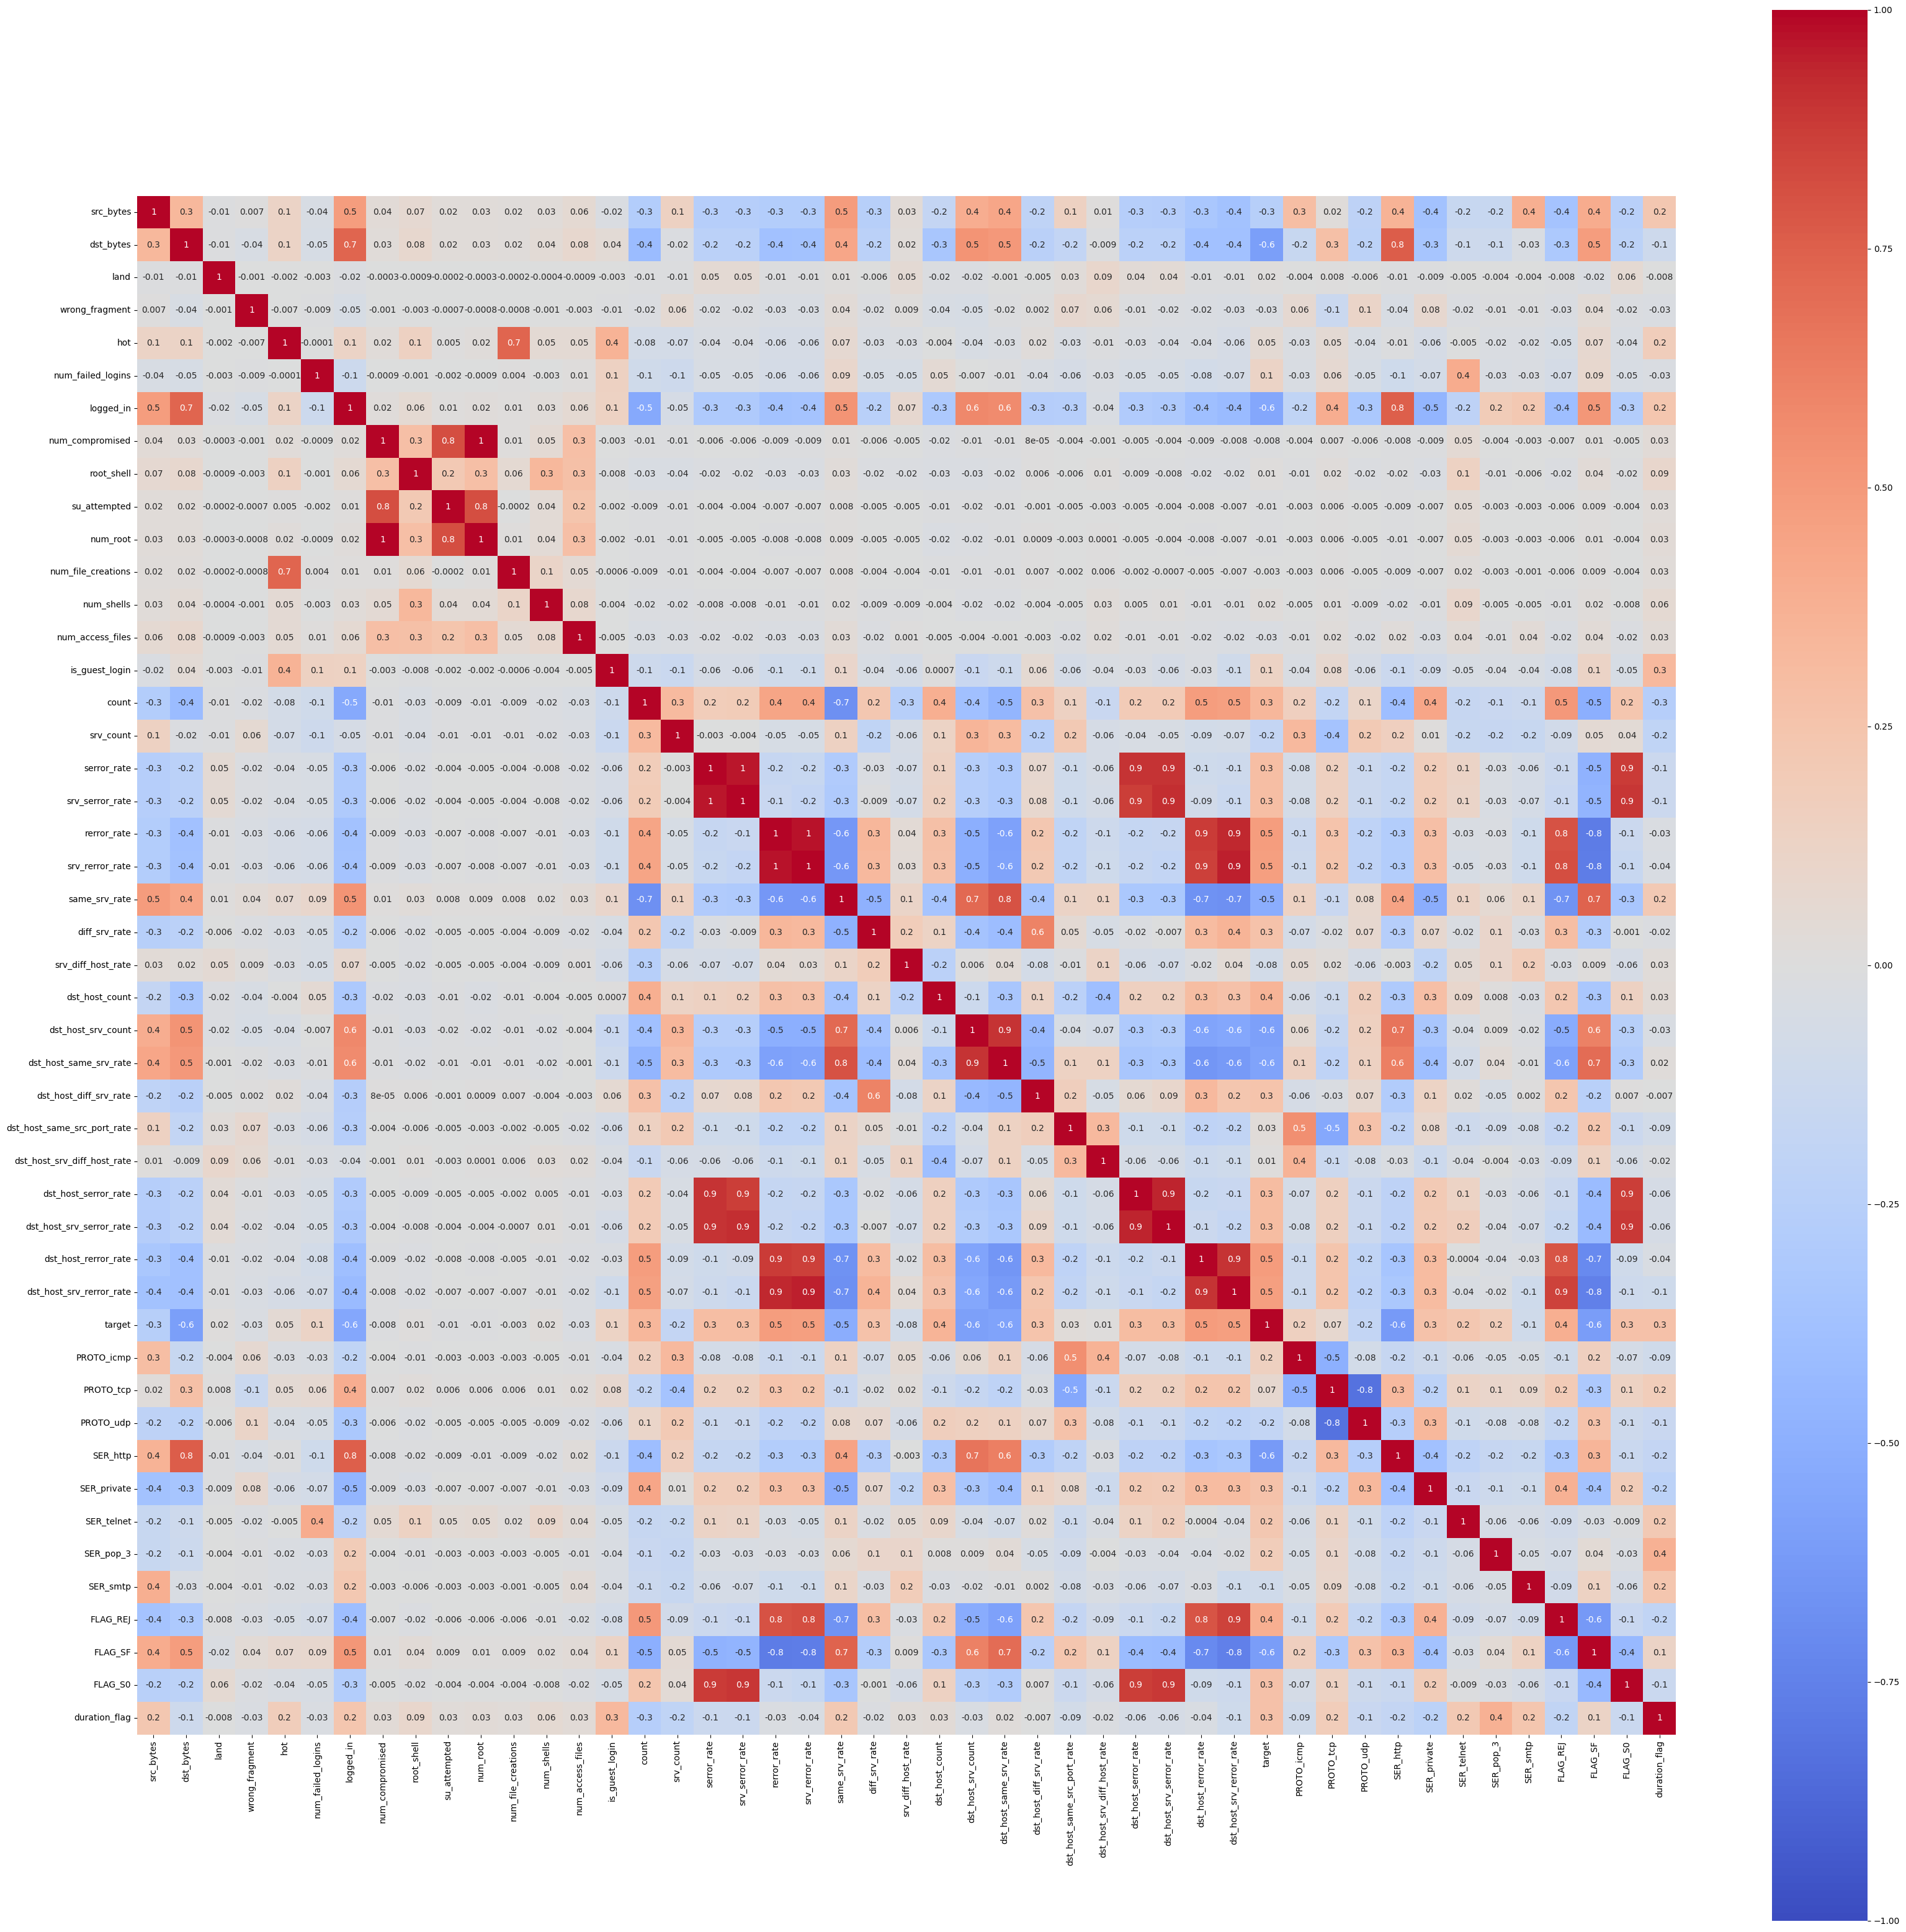

In [88]:
#Keeping only necessary columns
#Dropping variables where dummy variables have been created
anomaly_df_selected=anomaly_df_enc[['src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 
                                    'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
                                    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                                    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
                                    'dst_host_srv_rerror_rate', 'target', 'PROTO_icmp', 'PROTO_tcp', 'PROTO_udp', 'SER_http', 'SER_private', 'SER_telnet', 'SER_pop_3', 'SER_smtp', 'FLAG_REJ', 'FLAG_SF', 
                                    'FLAG_S0', 'duration_flag']]
#Correlation plot on cleaned data
corr = anomaly_df_selected.corr()
# Create larger heatmap
plt.figure(figsize=(40,40))
sns.heatmap(corr, cmap='coolwarm', annot=True,fmt='.1g', vmin=-1, vmax=1,square=True)

Index(['src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'hot',
       'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell',
       'su_attempted', 'num_root', 'num_file_creations', 'num_shells',
       'num_access_files', 'is_guest_login', 'count', 'srv_count',
       'serror_rate', 'srv_serror_rate', 'rerror_rate', 'srv_rerror_rate',
       'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate',
       'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate',
       'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate',
       'dst_host_srv_diff_host_rate', 'dst_host_serror_rate',
       'dst_host_srv_serror_rate', 'dst_host_rerror_rate',
       'dst_host_srv_rerror_rate', 'target', 'PROTO_icmp', 'PROTO_tcp',
       'PROTO_udp', 'SER_http', 'SER_private', 'SER_telnet', 'SER_pop_3',
       'SER_smtp', 'FLAG_REJ', 'FLAG_SF', 'FLAG_S0', 'duration_flag'],
      dtype='object')
[0.4835328  0.44221632 0.006044   0.00587561 0.01659084 0.00716963
 0.15778018 0.007801

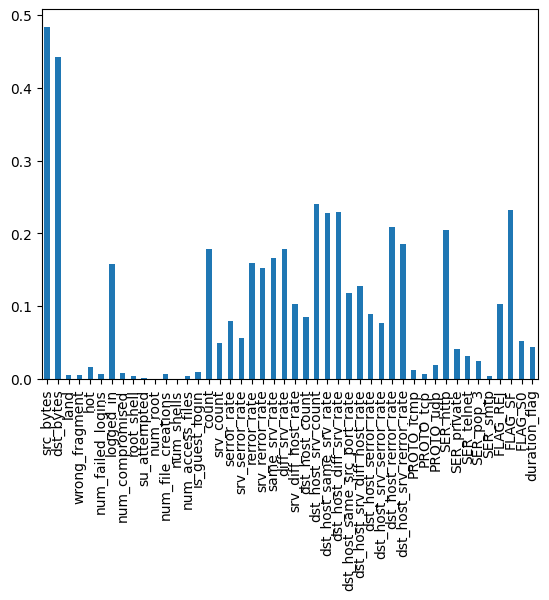

<Axes: xlabel='columns'>

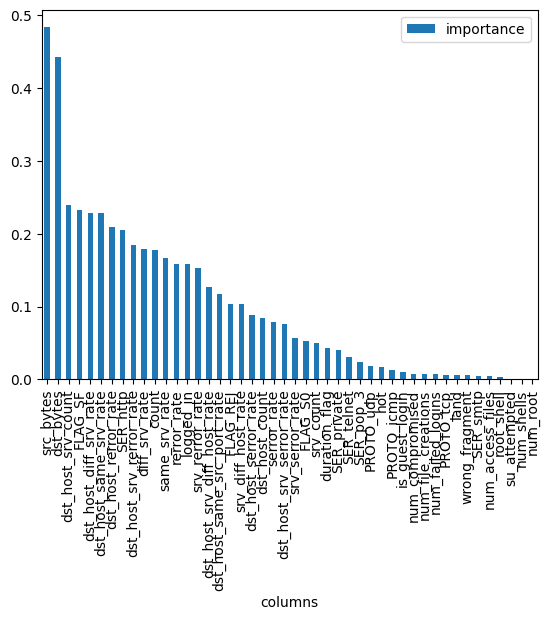

In [89]:
from sklearn import preprocessing
from sklearn.feature_selection import mutual_info_classif
import matplotlib.pyplot as plt

# Information Gain
print(anomaly_df_selected.columns)
X=anomaly_df_selected[['src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 
                                    'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
                                    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                                    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
                                    'dst_host_srv_rerror_rate', 'PROTO_icmp', 'PROTO_tcp', 'PROTO_udp', 'SER_http', 'SER_private', 'SER_telnet', 'SER_pop_3', 'SER_smtp', 'FLAG_REJ', 'FLAG_SF', 
                                    'FLAG_S0', 'duration_flag']]

Y=anomaly_df_selected['target']

importances = mutual_info_classif(X,Y,random_state=123)
print(importances)
feat_importances = pd.Series(importances,index=['src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 
                                    'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
                                    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                                    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
                                    'dst_host_srv_rerror_rate', 'PROTO_icmp', 'PROTO_tcp', 'PROTO_udp', 'SER_http', 'SER_private', 'SER_telnet', 'SER_pop_3', 'SER_smtp', 'FLAG_REJ', 'FLAG_SF', 
                                    'FLAG_S0', 'duration_flag'])
print(feat_importances)
feat_importances.plot(kind='bar')
plt.show()


columns = ['src_bytes', 'dst_bytes', 'land', 'wrong_fragment', 'hot', 'num_failed_logins', 'logged_in', 'num_compromised', 'root_shell', 'su_attempted', 'num_root', 
                                    'num_file_creations', 'num_shells', 'num_access_files', 'is_guest_login', 'count', 'srv_count', 'serror_rate', 'srv_serror_rate', 
                                    'rerror_rate', 'srv_rerror_rate', 'same_srv_rate', 'diff_srv_rate', 'srv_diff_host_rate', 'dst_host_count', 'dst_host_srv_count', 'dst_host_same_srv_rate', 
                                    'dst_host_diff_srv_rate', 'dst_host_same_src_port_rate', 'dst_host_srv_diff_host_rate', 'dst_host_serror_rate', 'dst_host_srv_serror_rate', 'dst_host_rerror_rate', 
                                    'dst_host_srv_rerror_rate', 'PROTO_icmp', 'PROTO_tcp', 'PROTO_udp', 'SER_http', 'SER_private', 'SER_telnet', 'SER_pop_3', 'SER_smtp', 'FLAG_REJ', 'FLAG_SF', 
                                    'FLAG_S0', 'duration_flag']

 
# Creating two Series by passing lists
col_series = pd.Series(columns)
imp_series = pd.Series(importances)
 
# Creating a dictionary by passing Series objects as values
frame = {'columns': col_series,
         'importance': imp_series}
 
# Creating DataFrame by passing Dictionary
df=pd.DataFrame(frame)
df=df.sort_values(by=['importance'],ascending=False)
# print(df)
df.plot(x='columns',y='importance', kind='bar')


In [90]:
# Calculate gini for the variables in the dataset
def gini_impurity (value_counts):
    n = value_counts.sum()
    p_sum = 0
    for key in value_counts.keys():
        p_sum = p_sum  +  (value_counts[key] / n ) * (value_counts[key] / n ) 
    gini = 1 - p_sum
    return gini

class_value_counts = anomaly_df_selected['target'].value_counts()
print(f'Number of samples in each class is:\n{class_value_counts}')

gini_class = gini_impurity(class_value_counts)
print(f'\nGini Impurity of the class is {gini_class:.3f}')


# Calculating  gini impurity for the attiributes
def gini_split_a(attribute_name):
    attribute_values = anomaly_df_selected[attribute_name].value_counts()
    gini_A = 0 
    for key in attribute_values.keys():
        df_k = anomaly_df_selected[class_name][anomaly_df_selected[attribute_name] == key].value_counts()
        n_k = attribute_values[key]
        n = anomaly_df_selected.shape[0]
        gini_A = gini_A + (( n_k / n) * gini_impurity(df_k))
    return gini_A
class_name='target'
gini_attribute ={}
for key in columns:
    gini_attribute[key] = gini_split_a(key)
    print(f'Gini for {key} is {gini_attribute[key]:.3f}')

Number of samples in each class is:
target
1    12830
0     9711
Name: count, dtype: int64

Gini Impurity of the class is 0.490


Gini for src_bytes is 0.117
Gini for dst_bytes is 0.127
Gini for land is 0.490
Gini for wrong_fragment is 0.490
Gini for hot is 0.475
Gini for num_failed_logins is 0.483
Gini for logged_in is 0.341
Gini for num_compromised is 0.485
Gini for root_shell is 0.490
Gini for su_attempted is 0.490
Gini for num_root is 0.490
Gini for num_file_creations is 0.490
Gini for num_shells is 0.490
Gini for num_access_files is 0.490
Gini for is_guest_login is 0.483
Gini for count is 0.339
Gini for srv_count is 0.445
Gini for serror_rate is 0.432
Gini for srv_serror_rate is 0.443
Gini for rerror_rate is 0.371
Gini for srv_rerror_rate is 0.375
Gini for same_srv_rate is 0.358
Gini for diff_srv_rate is 0.354
Gini for srv_diff_host_rate is 0.401
Gini for dst_host_count is 0.405
Gini for dst_host_srv_count is 0.277
Gini for dst_host_same_srv_rate is 0.289
Gini for dst_host_diff_srv_rate is 0.288
Gini for dst_host_same_src_port_rate is 0.378
Gini for dst_host_srv_diff_host_rate is 0.371
Gini for dst_host_serr

In [91]:
print(type(gini_attribute))
# print(gini_attribute)
# gini_attribute_df = pd.DataFrame.from_dict(gini_attribute,orient='index')
gini_attribute_df = pd.DataFrame(list(gini_attribute.items()),columns = ['Attribute','Gini_Value']) 
print(gini_attribute_df)
print(type(gini_attribute_df))


print(type(feat_importances))
# feat_importances_df=feat_importances.to_frame()
feat_importances_df = pd.DataFrame({'Attribute':feat_importances.index, 'Info_Gain':feat_importances.values})
# feat_importances_df.columns['Attribute','Value']
print(feat_importances_df)
print(type(feat_importances_df))

final_importance_df = pd.concat([gini_attribute_df, feat_importances_df], axis=1, join='inner')


final_importance_df['Importance'] = final_importance_df['Gini_Value'] + final_importance_df['Info_Gain']
display(final_importance_df)

print(final_importance_df.sort_values('Importance',ascending = False).head(10))


<class 'dict'>
                      Attribute  Gini_Value
0                     src_bytes    0.117409
1                     dst_bytes    0.127270
2                          land    0.490312
3                wrong_fragment    0.489693
4                           hot    0.474812
5             num_failed_logins    0.482508
6                     logged_in    0.341472
7               num_compromised    0.484697
8                    root_shell    0.490374
9                  su_attempted    0.490369
10                     num_root    0.489782
11           num_file_creations    0.490011
12                   num_shells    0.490114
13             num_access_files    0.489786
14               is_guest_login    0.482748
15                        count    0.339270
16                    srv_count    0.444885
17                  serror_rate    0.432106
18              srv_serror_rate    0.443194
19                  rerror_rate    0.371457
20              srv_rerror_rate    0.375346
21               

,Attribute,Gini_Value,Attribute,Info_Gain,Importance
0,src_bytes,0.117409,src_bytes,0.483533,0.600941
1,dst_bytes,0.127270,dst_bytes,0.442216,0.569486
2,land,0.490312,land,0.006044,0.496356
3,wrong_fragment,0.489693,wrong_fragment,0.005876,0.495569
4,hot,0.474812,hot,0.016591,0.491403
5,num_failed_logins,0.482508,num_failed_logins,0.007170,0.489678
6,logged_in,0.341472,logged_in,0.157780,0.499252
7,num_compromised,0.484697,num_compromised,0.007801,0.492498
8,root_shell,0.490374,root_shell,0.003401,0.493776
9,su_attempted,0.490369,su_attempted,0.001087,0.491455


                   Attribute  Gini_Value                 Attribute  Info_Gain  Importance
0                  src_bytes    0.117409                 src_bytes   0.483533    0.600941
1                  dst_bytes    0.127270                 dst_bytes   0.442216    0.569486
43                   FLAG_SF    0.310982                   FLAG_SF   0.232173    0.543154
22             diff_srv_rate    0.354187             diff_srv_rate   0.178545    0.532732
19               rerror_rate    0.371457               rerror_rate   0.158710    0.530168
33  dst_host_srv_rerror_rate    0.344956  dst_host_srv_rerror_rate   0.184761    0.529717
20           srv_rerror_rate    0.375346           srv_rerror_rate   0.152967    0.528314
32      dst_host_rerror_rate    0.316292      dst_host_rerror_rate   0.209062    0.525354
21             same_srv_rate    0.358481             same_srv_rate   0.166502    0.524983
42                  FLAG_REJ    0.417140                  FLAG_REJ   0.103313    0.520452


Based on the correlation plot, gini value and info gain the folowing attributes are selected for developing teh model:
src_bytes
dst_bytes
dst_host_srv_count
FLAG_SF
dst_host_diff_srv_rate
dst_host_rerror_rate
diff_srv_rate
count
rerror_rate
dst_host_serror_rate

# 3. Model Building 

1.	Split the dataset into training and test sets.
Case 1: 		Train = 80 % Test = 20% [ x_train1, y_train1] = 80%;[ x_test1, y_test1] = 20%;
Case 2: 		Train = 10 % Test = 90% [ x_train2, y_train2] = 10%;[ x_test2, y_test2] = 90% 



In [92]:
# Choosing the top 10 variable from variable selection and adding few more based on EDA
model_data_df=anomaly_df_selected[['src_bytes',
'dst_bytes',
'dst_host_srv_count',
'FLAG_SF',
'dst_host_diff_srv_rate',
'dst_host_rerror_rate',
'diff_srv_rate',
'count',
'rerror_rate',
'dst_host_serror_rate',
'target']]

# Case1
# Splitting the data into test and train
X_train1,X_test1,Y_train1,Y_test1=train_test_split(model_data_df.drop(labels=['target'], axis=1),
    model_data_df['target'],
    test_size=0.2,
    random_state=0)

print(X_train1.shape)
print(X_test1.shape)
print(Y_train1.shape)
print(Y_test1.shape)

# Case2
# Splitting the data into test and train
X_train2,X_test2,Y_train2,Y_test2=train_test_split(model_data_df.drop(labels=['target'], axis=1),
    model_data_df['target'],
    test_size=0.1,
    random_state=0)

print(X_train2.shape)
print(X_test1.shape)
print(Y_train2.shape)
print(Y_test2.shape)

(18032, 10)
(4509, 10)
(18032,)
(4509,)
(20286, 10)
(4509, 10)
(20286,)
(2255,)


3.	Build any two appropriate models

Since the target is a binary variable we can use any classification technique. Decision tree, Random Forest , Logistic Regression, KNN etc. are few examples of classification techniques. 


### Logistic regression

Logistic regression is a Machine Learning classification algorithm that is used to predict the probability of certain classes based on some dependent variables. We have a list of predictors or independent variables and a target variable. Logistic regression will give us a probability of target=1.

In [93]:
from sklearn.model_selection import train_test_split
from sklearn.metrics import roc_curve, roc_auc_score


#Model 1 on Case 1 split without regularization
model1=LogisticRegression(solver='liblinear', max_iter=10000)
model1.fit(X_train1, Y_train1)
Y_pred_train1 = model1.predict(X_train1)
Y_pred_test1 = model1.predict(X_test1)


#Model 1 on Case 2 split without regularization
model2=LogisticRegression(solver='liblinear', max_iter=10000)
model2.fit(X_train2, Y_train2)
Y_pred_train2 = model2.predict(X_train2)
Y_pred_test2 = model2.predict(X_test2)


### Decision Tree

A decision tree is one of the most powerful tools of supervised learning algorithms used for both classification and regression tasks. It builds a flowchart-like tree structure where each internal node denotes a test on an attribute, each branch represents an outcome of the test, and each leaf node (terminal node) holds a class label. It is constructed by recursively splitting the training data into subsets based on the values of the attributes until a stopping criterion is met, such as the maximum depth of the tree or the minimum number of samples required to split a node.

Since ours is a classification problem, Decision Tree can be an alternative way to decide if a customer is defaulter or not.

In [94]:
from sklearn.tree import DecisionTreeClassifier

#Model 2 on Case 1 split
decision_tree1 = DecisionTreeClassifier(max_depth=4)
decision_tree1.fit(X_train1,Y_train1)
Y_score_train3 = decision_tree1.predict(X_train1)
Y_score_test3 = decision_tree1.predict(X_test1)

#Model 2 on Case 2 split
decision_tree2 = DecisionTreeClassifier(max_depth=4)
decision_tree2.fit(X_train1,Y_train1)
Y_score_train4 = decision_tree2.predict(X_train2)
Y_score_test4 = decision_tree2.predict(X_test2)

2.	Explore k-fold cross validation

4.	Explore the need of regularization and incorporate few relevant techniques for the problem statement. 

In [95]:
# Set the regularization type (L1, L2, Elastic Net)
penalty = 'l1'

# Set the regularization strength (C)
C = 0.01


#Model 1 on Case 1 split with regularization
model_r1 = LogisticRegression(solver='liblinear', max_iter=10000,penalty=penalty, C=C)
model_r1.fit(X_train1, Y_train1)
Y_pred_train_r1 = model_r1.predict(X_train1)
Y_pred_test_r1 = model_r1.predict(X_test1)


5.	Compare models with and without regularization in a tabular format and justify the findings. 

In [96]:
#Model 1 on Case 1 split (without regularization)
# Accuracy
print("===============================================================================")
print('----Logistic Regression model results on 80:20 split-----')
print('Accuracy of Logistic regression classifier on Training set: {}'.format(accuracy_score(Y_train1, Y_pred_train1)))
print('Accuracy of Logistic regression classifier on Testing Data: {}'.format(accuracy_score(Y_test1, Y_pred_test1)))

# ROC AUC
y_score_train1 = model1.predict_proba(X_train1)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_train1, y_score_train1)
print('Roc_auc_score on Training Data: ', roc_auc_score(Y_train1, y_score_train1))

y_score_test1 = model1.predict_proba(X_test1)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test1, y_score_test1)
print('Roc_auc_score on Test Data: ', roc_auc_score(Y_test1, y_score_test1))
print("===============================================================================")

#Model 1 on Case 1 split (with regularization)
# Accuracy
print("===============================================================================")
print('----Logistic Regression model results on 80:20 split-----')
print('Accuracy of Logistic regression classifier on Training set: {}'.format(accuracy_score(Y_train1, Y_pred_train_r1)))
print('Accuracy of Logistic regression classifier on Testing Data: {}'.format(accuracy_score(Y_test1, Y_pred_test_r1)))
# ROC AUC
y_score_train5 = model_r1.predict_proba(X_train1)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_train1, y_score_train5)
print('Roc_auc_score on Training Data: ', roc_auc_score(Y_train1, y_score_train5))

y_score_test5 = model_r1.predict_proba(X_test1)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test1, y_score_test5)
print('Roc_auc_score on Test Data: ', roc_auc_score(Y_test1, y_score_test5))
print("===============================================================================")

----Logistic Regression model results on 80:20 split-----
Accuracy of Logistic regression classifier on Training set: 0.8396739130434783
Accuracy of Logistic regression classifier on Testing Data: 0.8416500332667998
Roc_auc_score on Training Data:  0.9377597318276785
Roc_auc_score on Test Data:  0.9349725326100334
----Logistic Regression model results on 80:20 split-----
Accuracy of Logistic regression classifier on Training set: 0.8517635314995563
Accuracy of Logistic regression classifier on Testing Data: 0.8518518518518519
Roc_auc_score on Training Data:  0.9318181238923431
Roc_auc_score on Test Data:  0.9289906633250806


Accuracy & AUC of the model with regularization is lower than the one without.

# 4. Performance Evaluation 

1.	Do the prediction for the test data and display the results for the inference. Calculate all the evaluation metrics and choose best for your model. Justify your answer.

Compare the performance of the ML techniques used.

Performance study metrics like accuracy, precision, recall, F1 Score, AUC-ROC, confusion matric etc are extracted to compare the ML algorithms. A proper comparision across different metrics helps us to judge the best model. In thsi case we are using accuracy, AUC & ROC curve to choose the best model.

----Logistic Regression model results on 80:20 split-----
Accuracy of Logistic regression classifier on Training set: 0.8396739130434783
Accuracy of Logistic regression classifier on Testing Data: 0.8416500332667998
Roc_auc_score on Training Data:  0.9377597318276785
Roc_auc_score on Test Data:  0.9349725326100334


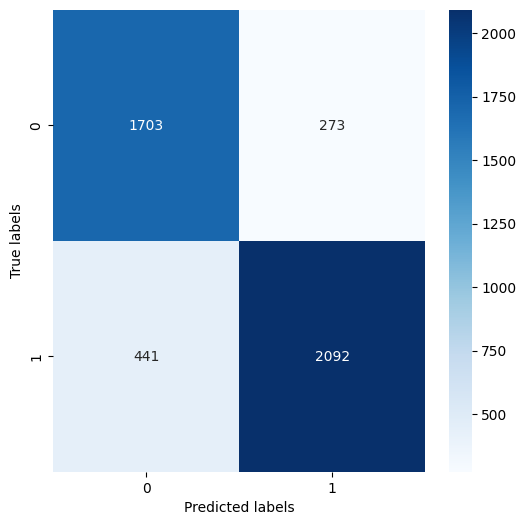

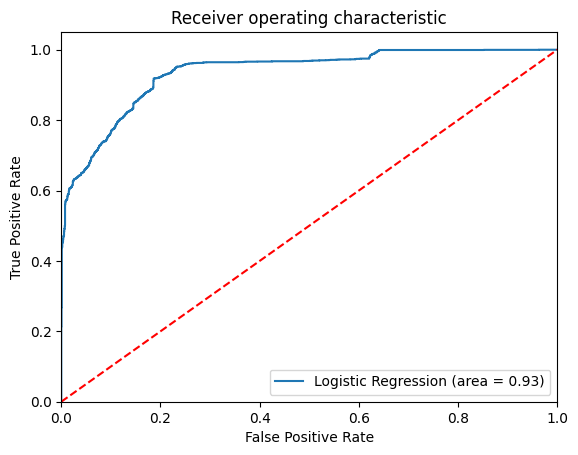

----Logistic Regression model results on 90:10 split-----
Accuracy of Logistic regression classifier on Training set: 0.8390515626540471
Accuracy of Logistic regression classifier on Testing Data: 0.8492239467849224
Roc_auc_score on Training Data:  0.9372429685914183
Roc_auc_score on Test Data:  0.9369134790135177


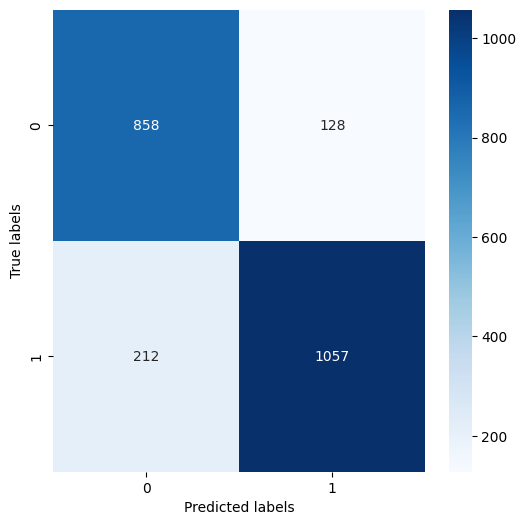

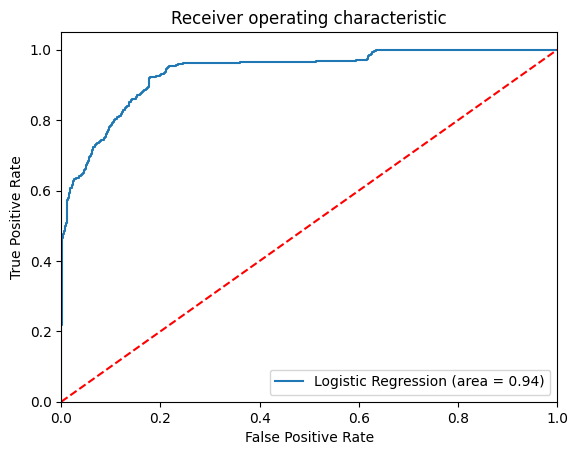

In [97]:
from sklearn.metrics import confusion_matrix
import matplotlib.pyplot as plt
import seaborn as sns

#Model 1 on Case 1 split (without regularization)
# Accuracy
print("===============================================================================")
print('----Logistic Regression model results on 80:20 split-----')
print('Accuracy of Logistic regression classifier on Training set: {}'.format(accuracy_score(Y_train1, Y_pred_train1)))
print('Accuracy of Logistic regression classifier on Testing Data: {}'.format(accuracy_score(Y_test1, Y_pred_test1)))

# ROC AUC
y_score_train1 = model1.predict_proba(X_train1)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_train1, y_score_train1)
print('Roc_auc_score on Training Data: ', roc_auc_score(Y_train1, y_score_train1))

y_score_test1 = model1.predict_proba(X_test1)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test1, y_score_test1)
print('Roc_auc_score on Test Data: ', roc_auc_score(Y_test1, y_score_test1))
print("===============================================================================")

# Create confusion matrix
cm = confusion_matrix(Y_test1, Y_pred_test1)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Plotting ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test1, y_score_test1)
fpr, tpr, thresholds = roc_curve(Y_test1, y_score_test1)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()



#Model 1 on Case 2 split (without regularization)
# Accuracy
print("===============================================================================")
print('----Logistic Regression model results on 90:10 split-----')
print('Accuracy of Logistic regression classifier on Training set: {}'.format(accuracy_score(Y_train2, Y_pred_train2)))
print('Accuracy of Logistic regression classifier on Testing Data: {}'.format(accuracy_score(Y_test2, Y_pred_test2)))

# ROC AUC
y_score_train2 = model1.predict_proba(X_train2)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_train2, y_score_train2)
print('Roc_auc_score on Training Data: ', roc_auc_score(Y_train2, y_score_train2))

y_score_test2 = model1.predict_proba(X_test2)[:,1]
false_positive_rate2, true_positive_rate2, threshold2 = roc_curve(Y_test2, y_score_test2)
print('Roc_auc_score on Test Data: ', roc_auc_score(Y_test2, y_score_test2))
print("===============================================================================")


# Create confusion matrix
cm = confusion_matrix(Y_test2, Y_pred_test2)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


# Plotting ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test2, y_score_test2)
fpr, tpr, thresholds = roc_curve(Y_test2, y_score_test2)
plt.figure()
plt.plot(fpr, tpr, label='Logistic Regression (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()




----Decision Tree model results on 80:20 split-----
Accuracy of Decision Tree classifier on Training set: 0.9272959183673469
Accuracy of Decision Tree classifier on Testing Data: 0.9301397205588823
Roc_auc_score on Training Data:  0.9776000741770327
Roc_auc_score on Test Data:  0.9777083190149141


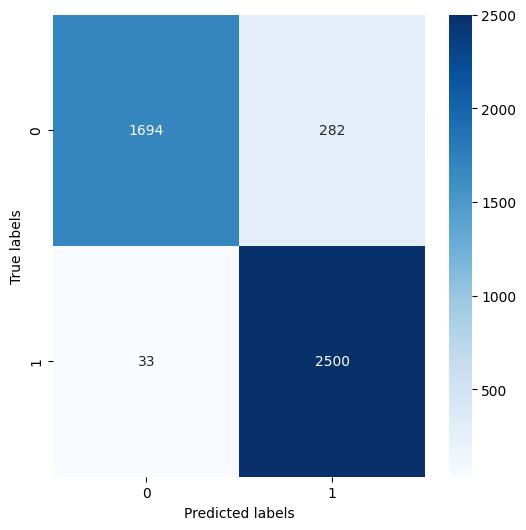

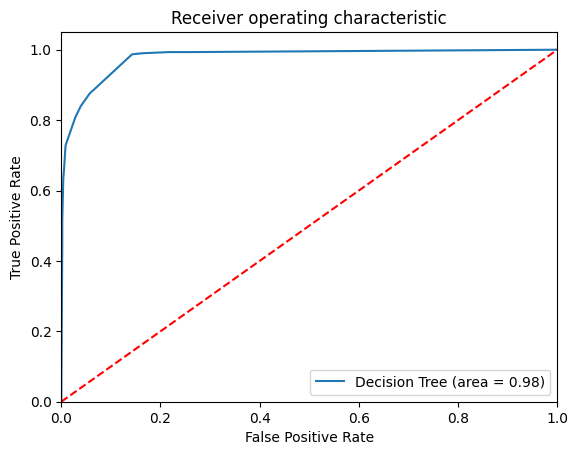

----Decision Tree model results on 90:10 split-----
Accuracy of Decision Tree classifier on Training set: 0.927585526964409
Accuracy of Decision Tree classifier on Testing Data: 0.9303769401330377
Roc_auc_score on Training Data:  0.9778168672512988
Roc_auc_score on Test Data:  0.9757595301917946


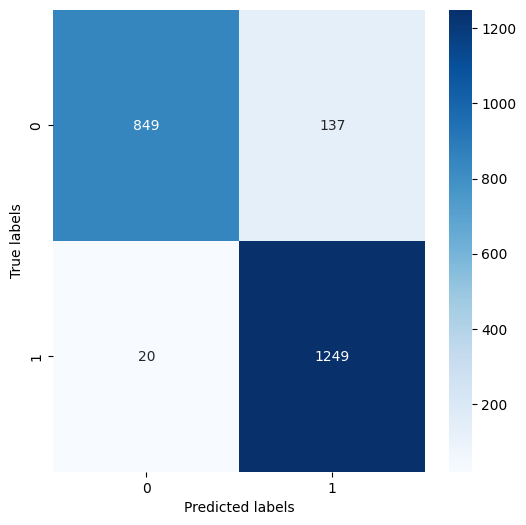

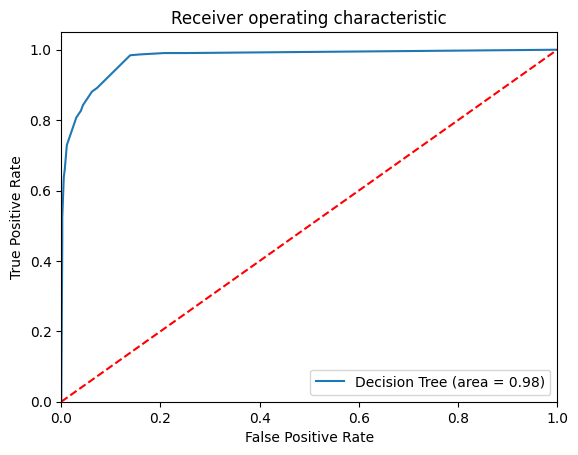

In [98]:
#Model 2 on Case 1 split
# Accuracy
print("===============================================================================")
print('----Decision Tree model results on 80:20 split-----')
print('Accuracy of Decision Tree classifier on Training set: {}'.format(accuracy_score(Y_train1, Y_score_train3)))
print('Accuracy of Decision Tree classifier on Testing Data: {}'.format(accuracy_score(Y_test1, Y_score_test3)))

# ROC AUC
y_score_train3 = decision_tree1.predict_proba(X_train1)[:,1]
false_positive_rate3, true_positive_rate3, threshold3 = roc_curve(Y_train1, y_score_train3)
print('Roc_auc_score on Training Data: ', roc_auc_score(Y_train1, y_score_train3))

y_score_test3 = decision_tree1.predict_proba(X_test1)[:,1]
false_positive_rate1, true_positive_rate1, threshold1 = roc_curve(Y_test1, y_score_test3)
print('Roc_auc_score on Test Data: ', roc_auc_score(Y_test1, y_score_test3))
print("===============================================================================")

# Create confusion matrix
cm = confusion_matrix(Y_test1, Y_score_test3)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# Plotting ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test1, y_score_test3)
fpr, tpr, thresholds = roc_curve(Y_test1, y_score_test3)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


#Model 2 on Case 2 split
# Accuracy
print("===============================================================================")
print('----Decision Tree model results on 90:10 split-----')
print('Accuracy of Decision Tree classifier on Training set: {}'.format(accuracy_score(Y_train2, Y_score_train4)))
print('Accuracy of Decision Tree classifier on Testing Data: {}'.format(accuracy_score(Y_test2, Y_score_test4)))

# ROC AUC
y_score_train4 = decision_tree2.predict_proba(X_train2)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_train2, y_score_train4)
print('Roc_auc_score on Training Data: ', roc_auc_score(Y_train2, y_score_train4))

y_score_test4 = decision_tree2.predict_proba(X_test2)[:,1]
false_positive_rate4, true_positive_rate4, threshold4 = roc_curve(Y_test2, y_score_test4)
print('Roc_auc_score on Test Data: ', roc_auc_score(Y_test2, y_score_test4))
print("===============================================================================")

# Create confusion matrix
cm = confusion_matrix(Y_test2, Y_score_test4)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()


# Plotting ROC
from sklearn.metrics import roc_auc_score
from sklearn.metrics import roc_curve
logit_roc_auc = roc_auc_score(Y_test2, y_score_test4)
fpr, tpr, thresholds = roc_curve(Y_test2, y_score_test4)
plt.figure()
plt.plot(fpr, tpr, label='Decision Tree (area = %0.2f)' % logit_roc_auc)
plt.plot([0, 1], [0, 1],'r--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver operating characteristic')
plt.legend(loc="lower right")
plt.savefig('Log_ROC')
plt.show()


2.	Comment on underfitting/overfitting/just right model. Justify your comment. 

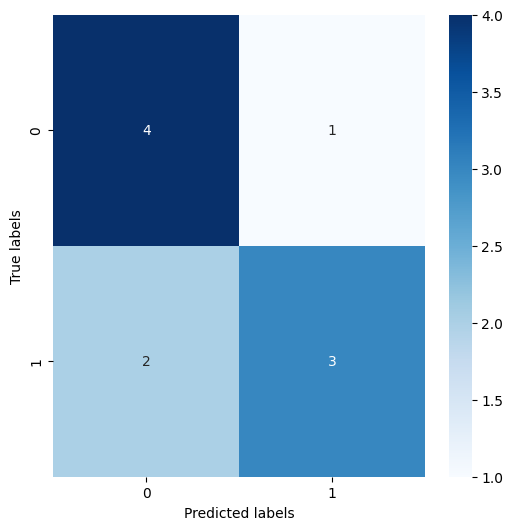

In [99]:


# Example true labels and predicted labels
y_true = [0, 1, 0, 1, 0, 1, 0, 1, 0, 1]
y_pred = [0, 1, 1, 1, 0, 0, 0, 1, 0, 0]

# Create confusion matrix
cm = confusion_matrix(y_true, y_pred)

# Plot confusion matrix
plt.figure(figsize=(6, 6))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues")
plt.xlabel('Predicted labels')
plt.ylabel('True labels')
plt.show()

# 5. Model Deployment

1.	Study and compare 4-5 methods/tools for deploying ML models.

Refer to the presentation

2.	Persist (save) and deploy the model you have built, using one of the methods/tools studied. The deployment solution should be capable of accepting HTTP requests with new feature values, querying the saved model and return the result back to the user. 

In [100]:
import joblib

# Save the model
joblib.dump(decision_tree1, 'model.pkl')

['model.pkl']

In [101]:
input_data =  np.array([267.0, 1502.5, 255.0, True, 0.0, 0.0, 0.0, 4, 0.0, 0.01]).reshape(1, -1)
predictions = decision_tree1.predict(input_data)

c:\Users\amano\miniconda3\envs\amlEnv\Lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(


In [102]:
predictions

array([0], dtype=int64)

In [103]:
model_data_df.to_csv("cleaned.csv", index=False)

In [106]:
rf = pd.read_csv("cleaned.csv")

In [109]:
rf.head(10)

,src_bytes,dst_bytes,dst_host_srv_count,FLAG_SF,dst_host_diff_srv_rate,dst_host_rerror_rate,diff_srv_rate,count,rerror_rate,dst_host_serror_rate,target
0,0.0,0.0,10.0,False,0.06,1.00,0.06,229,1.0,0.00,1
1,0.0,0.0,1.0,False,0.06,1.00,0.06,136,1.0,0.00,1
2,717.5,0.0,86.0,True,0.04,0.00,0.00,1,0.0,0.00,0
3,20.0,0.0,57.0,True,0.00,0.00,0.00,1,0.0,0.00,1
4,0.0,15.0,86.0,False,0.17,0.83,0.00,1,1.0,0.00,1
5,267.0,1502.5,255.0,True,0.00,0.00,0.00,4,0.0,0.01,0
6,717.5,387.0,28.0,True,0.72,0.72,0.00,1,0.0,0.00,0
7,129.0,174.0,255.0,True,0.00,0.02,0.00,1,0.0,0.01,1
8,327.0,467.0,255.0,True,0.00,0.00,0.00,33,0.0,0.00,0
9,26.0,157.0,26.0,True,0.08,0.00,0.00,1,0.0,0.00,1
